In [1]:
!pip install numpy
!pip install matplotlib
!pip install mat73

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import mat73
import os
%matplotlib inline
np.random.seed(42)

In [3]:
file_paths = os.listdir('../data/data_fruit/')
file_paths = file_paths[1:]
images = []
for path in file_paths:
    im = image.imread('../data/data_fruit/'+path)
    im = im.reshape(19200,)
    images.append(im)
images = np.array(images)

In [4]:
def normalizeData(data):
    return (data- np.min(data))/(np.max(data) - np.min(data))

In [5]:
mean = np.sum(images,axis=0)/(images.shape[0])

In [6]:
centralized_images = images.copy()
for i in range(images.shape[1]):
    centralized_images[:,i] = centralized_images[:,i] - mean[i]

In [7]:
cov_matrix = np.matmul(centralized_images.transpose(),centralized_images)/centralized_images.shape[0]

In [8]:
eValues, eVectors = np.linalg.eigh(cov_matrix)

In [9]:
eValues = np.flip(eValues)
eVectors = np.flip(eVectors, axis=1)

principal_eVectors = eVectors[:,:4]

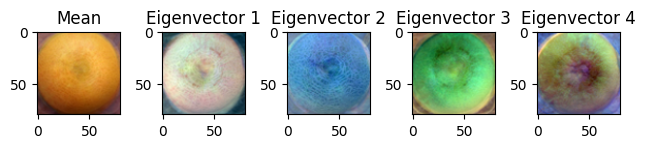

In [10]:
fig, ax = plt.subplots(1,5)

plt.subplot(1,5,1)
plt.title("Mean")
plt.imshow(normalizeData(mean).reshape(80,80,3))
# ax[0].title("Mean")
# ax[0].imshow(normalizeData(mean).reshape(80,80,3))
for i in range(4):
    plt.subplot(1,5,i+2)
    plt.title(f"Eigenvector {i+1}")
    plt.imshow(normalizeData(principal_eVectors[:,i]).reshape(80,80,3))
plt.tight_layout()
plt.show()

In [11]:
top10_eValues = eValues[:10]

Text(0.5, 1.0, 'Scatter plot of top 10 eigenvalues')

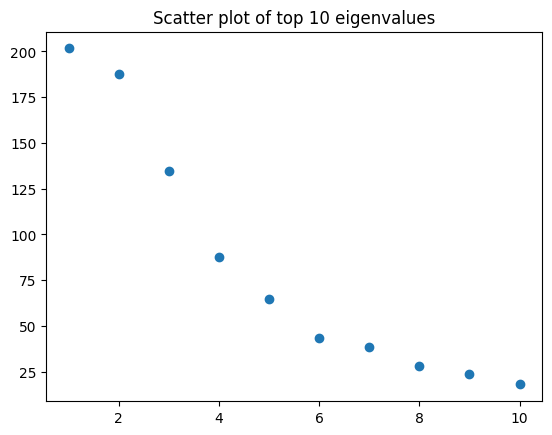

In [12]:
plt.scatter(y=top10_eValues, x=range(1,11))
plt.title("Scatter plot of top 10 eigenvalues")

In [13]:
regenerated_images = np.matmul(principal_eVectors.transpose(),centralized_images.transpose())
regenerated_images = np.matmul(principal_eVectors,regenerated_images)
regenerated_images = regenerated_images.transpose()

for i in range(regenerated_images.shape[1]):
    regenerated_images[:,i] = regenerated_images[:,i] + mean[i]

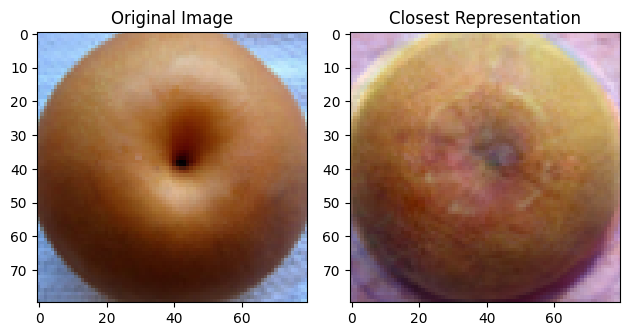

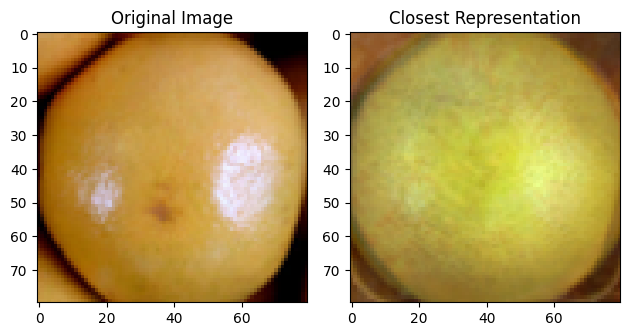

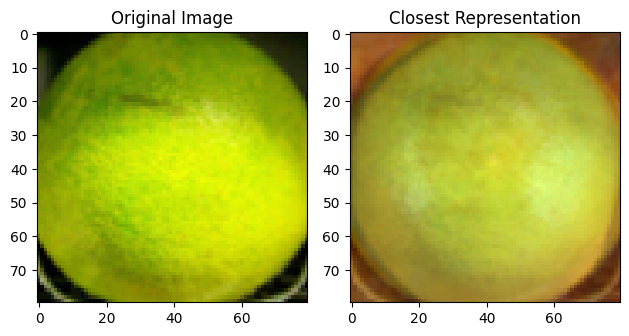

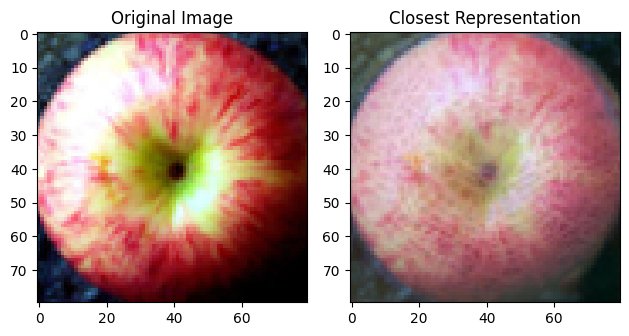

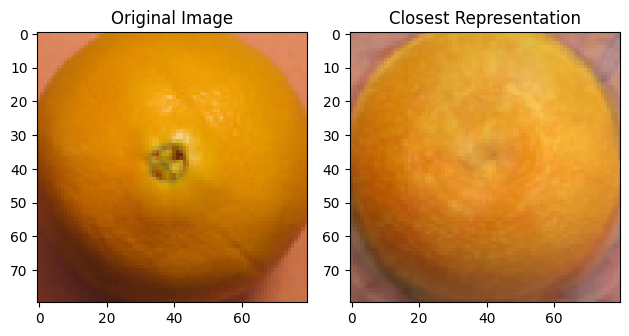

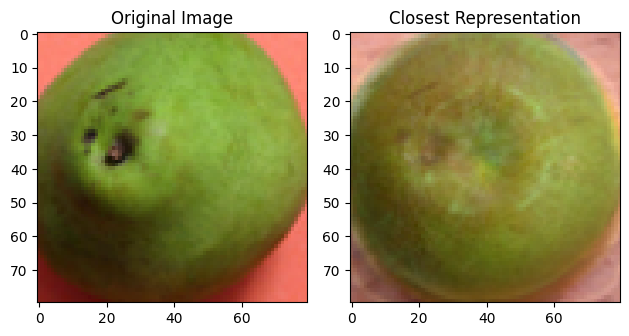

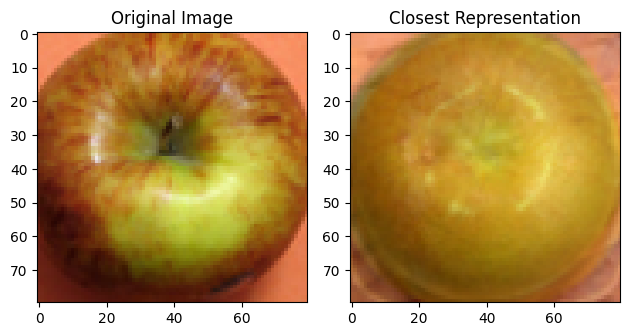

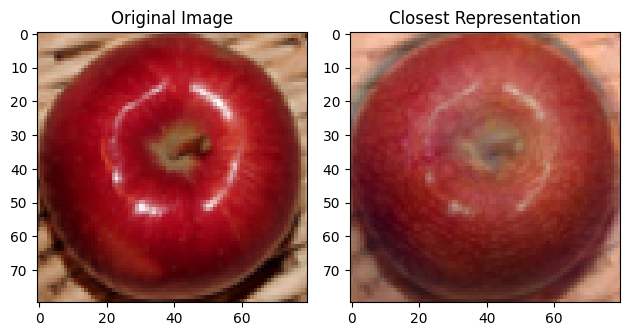

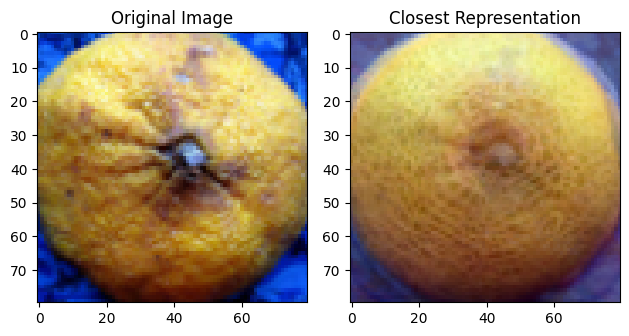

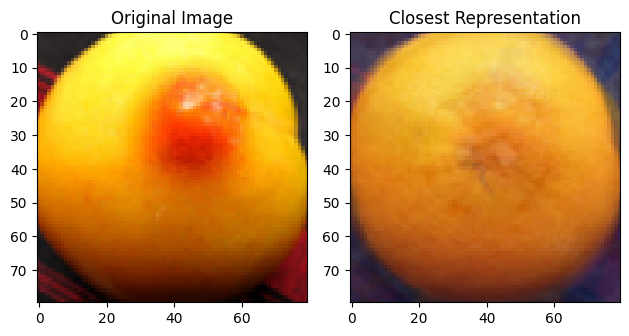

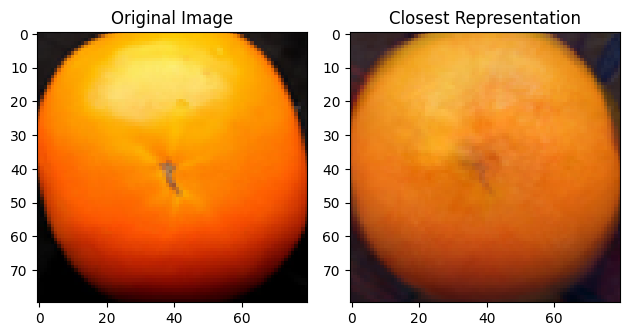

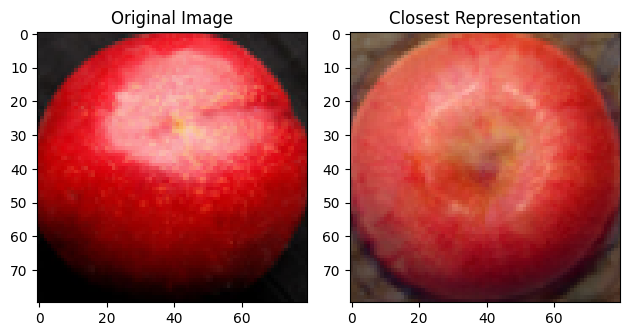

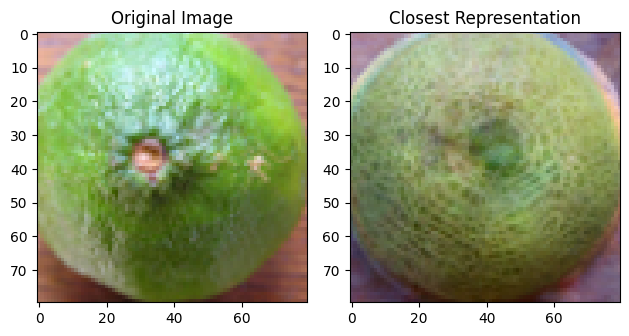

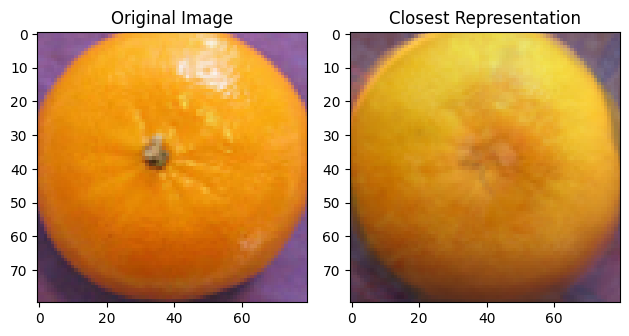

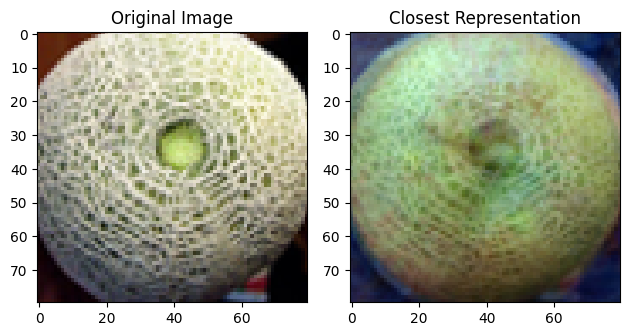

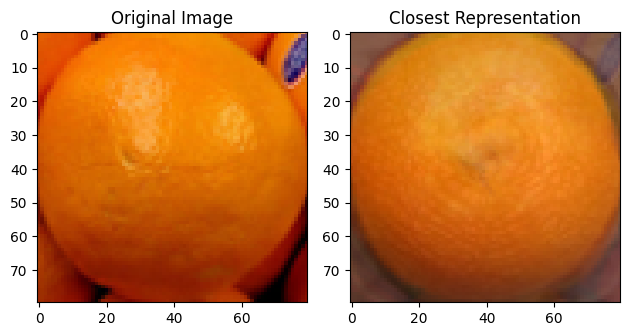

In [14]:
for i in range(16):
    plt.subplot(1,2,1)
    plt.title(f"Original Image")
    plt.imshow(normalizeData(images[i,:]).reshape(80,80,3))
    plt.subplot(1,2,2)
    plt.title(f"Closest Representation")
    plt.imshow(normalizeData(regenerated_images[i,:]).reshape(80,80,3))
    plt.tight_layout()
    plt.show()

In [15]:
top4_evalues = eValues.copy()
for i in range(top4_evalues.shape[0]):
    if i >=4:
        top4_evalues[i]=0

In [16]:
top4_evalues = np.diag(top4_evalues)

In [17]:
eVectors_matrix = eVectors.copy()
for i in range(19200):
    if i >= 4:
        eVectors_matrix[:,i] = 0

In [18]:
def randomPointGenerator():
    point = np.random.randn(19200,1)
    point = np.matmul(np.sqrt(top4_evalues), point)
    point = np.matmul(eVectors_matrix, point)
    
    point = point + mean.reshape(19200,1)
    return point

In [19]:
points = []
for i in range(3):
    p = randomPointGenerator()
    points.append(p)

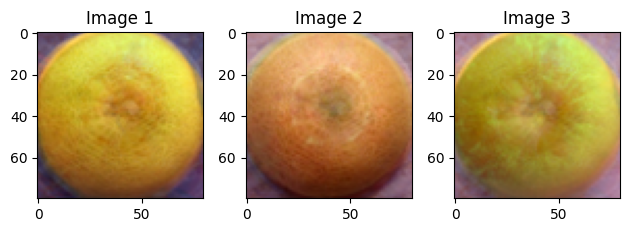

In [20]:
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.title(f"Image {i}")
    plt.imshow(normalizeData(points[i-1]).reshape(80,80,3))
plt.tight_layout()
plt.show()